In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.discrete_curves import DiscreteCurves

from geomstats.geometry.hypersphere import Hypersphere
import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA


v1=0
v2=0

dim = 2
n_samples = 2
sphere = Hypersphere(dim = dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print (points_in_manifold)
data = sphere.random_von_mises_fisher(kappa=15, n_samples=140)

[[-0.15712728  0.81450934  0.55846715]
 [-0.71274711 -0.03150175 -0.70071335]]


In [4]:
print (data.shape)

print(data[0])

(140, 3)
[ 0.91529961 -0.20677911 -0.34564292]


True


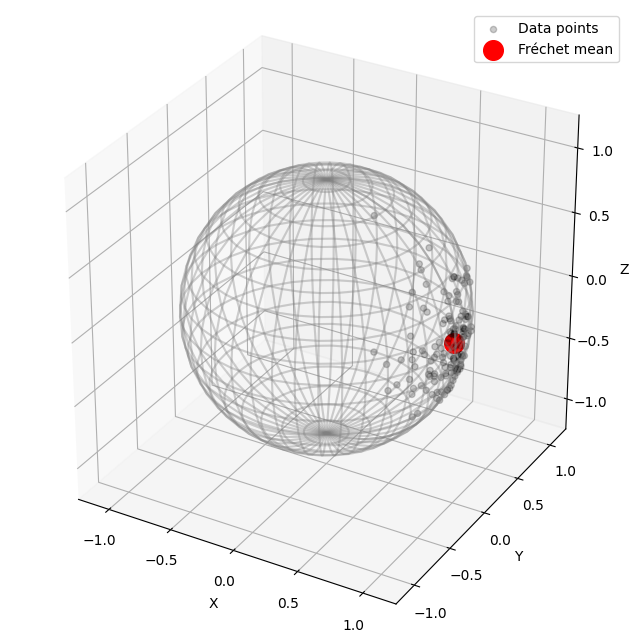

In [13]:
mean = FrechetMean(metric=sphere.metric)
mean.fit(data)

mean_estimate = mean.estimate_

print(sphere.belongs(mean_estimate))

fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space="S2", color="black", alpha=0.2, label="Data points")
ax = visualization.plot(
    mean_estimate, space="S2", color="red", ax=ax, s=200, label="Fréchet mean"
)
ax.set_box_aspect([1, 1, 1])
ax.legend();

In [14]:
tpca = TangentPCA(metric=sphere.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

geodesic_0 = sphere.metric.geodesic(
    initial_point=mean_estimate, initial_tangent_vec=tpca.components_[0]
)
geodesic_1 = sphere.metric.geodesic(
    initial_point=mean_estimate, initial_tangent_vec=tpca.components_[1]
)

print (data.shape)
print (tangent_projected_data.shape)

print (sphere.belongs(tpca.components_[1]))

(140, 3)
(140, 2)
True


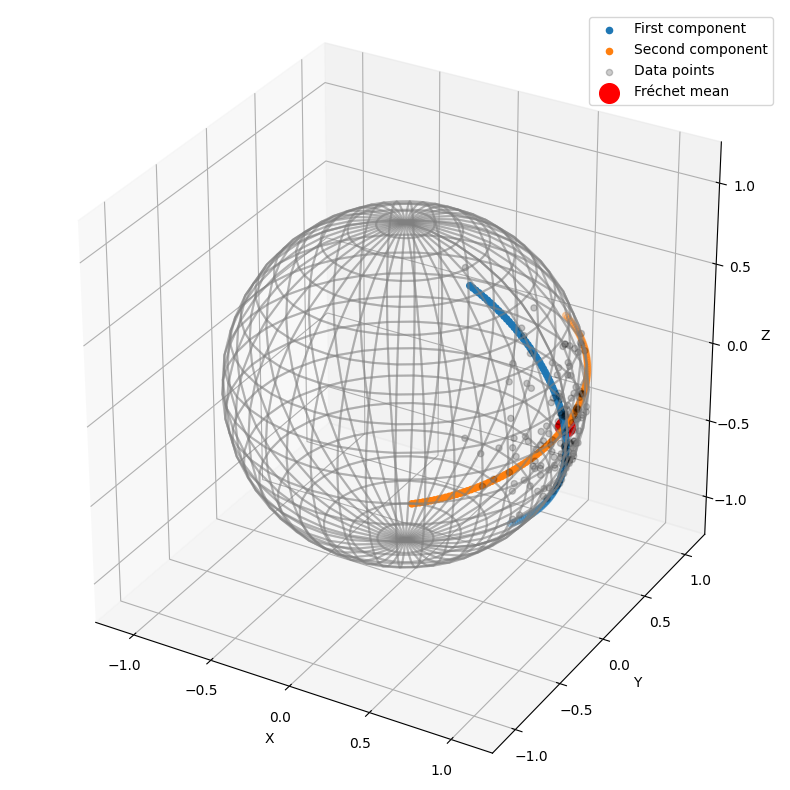

In [15]:
n_steps = 100
t = gs.linspace(-1.0, 1.0, n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax = visualization.plot(
    geodesic_points_0, ax, space="S2", linewidth=1, label="First component"
)
ax = visualization.plot(
    geodesic_points_1, ax, space="S2", linewidth=1, label="Second component"
)
ax = visualization.plot(
    data, ax, space="S2", color="black", alpha=0.2, label="Data points"
)
ax = visualization.plot(
    mean_estimate, ax, space="S2", color="red", s=200, label="Fréchet mean"
)
ax.legend()
ax.set_box_aspect([1, 1, 1])
plt.show()

In [17]:
from geomstats.geometry.discrete_curves import R2, DiscreteCurves, SRVMetric

curves = DiscreteCurves(R2)
metric = curves.srv_metric

In [ ]:
r3 = Euclidean(dim=3)
curves_r3 = DiscreteCurves(ambient_manifold=r3)

curve_a, _, _, _, _, ptn_a = GetMyVtk(files[98])
curve_b, _, _, _, _, ptn_b = GetMyVtk(files[26])

cut_len = min(curve_a.shape[0], curve_b.shape[0])
if curve_a.shape[0] > curve_b.shape[0]:
    curve_a = curve_a[:cut_len,:]
elif curve_a.shape[0] < curve_b.shape[0]:
    curve_b = curve_b[:cut_len,:]
print (curve_a.shape)
print (curve_b.shape)


geod_fun = curves_r3.srv_metric.geodesic(curve_a, curve_b)

n_times = 40
t = gs.linspace(0.0, 1.0, n_times)
geod = geod_fun(t)
v1=45
v2=0
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(curve_a[:, 0], curve_a[:, 1], curve_a[:, 2], "-", c="b", linewidth=4)
ax.plot(curve_b[:, 0], curve_b[:, 1], curve_b[:, 2], "-", c="r", linewidth=4)
for i in range(1, n_times - 1):
    #print (((i+0.0)/n_times))
    ax.plot(geod[i, :, 0], geod[i, :, 1], geod[i, :, 2], "-", c=[0+((i+0.0)/n_times),0.4,1-((i+0.0)/n_times)], linewidth=1)
    #ax.scatter(geod[i, :, 0], geod[i, :, 1], geod[i, :, 2], c=[0+((i+0.0)/n_times),0,1-((i+0.0)/n_times)], s=8)
# for j in range(cut_len):
    # ax.plot(geod[:, j, 0], geod[:, j, 1], geod[:, j, 2], "-", c="k", alpha=0.3)
ax.view_init(v1, v2)
plt.title("SRV geodesic")
plt.show()